**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sklearn.preprocessing import MinMaxScaler as mms
import numpy as np
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime
plt.style.use('fivethirtyeight')

**Input the name of the NASDAQ name of the Company to predict the Stock Price**

In [2]:
name = input()
today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)
d_yesterday = today - datetime.timedelta(days = 2)
print("Yesterday's date : ", yesterday)
print("Day before Yesterday : ", d_yesterday)
d_yesterday = str(d_yesterday)
yesterday = str(yesterday)

AAPL
Yesterday's date :  2020-10-25
Day before Yesterday :  2020-10-24


**Creating the Data Frame using Yahoo as the Data Source**

In [3]:
df = web.DataReader(name, data_source = 'yahoo', start='2010-01-01', end = d_yesterday)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.542150
...,...,...,...,...,...,...
2020-10-19,120.419998,115.660004,119.959999,115.980003,120639300.0,115.980003
2020-10-20,118.980003,115.629997,116.199997,117.510002,124423700.0,117.510002
2020-10-21,118.709999,116.449997,116.669998,116.870003,89946000.0,116.870003


In [4]:
df.shape

(2722, 6)

**Visualizing the Closing Price of Stocks**

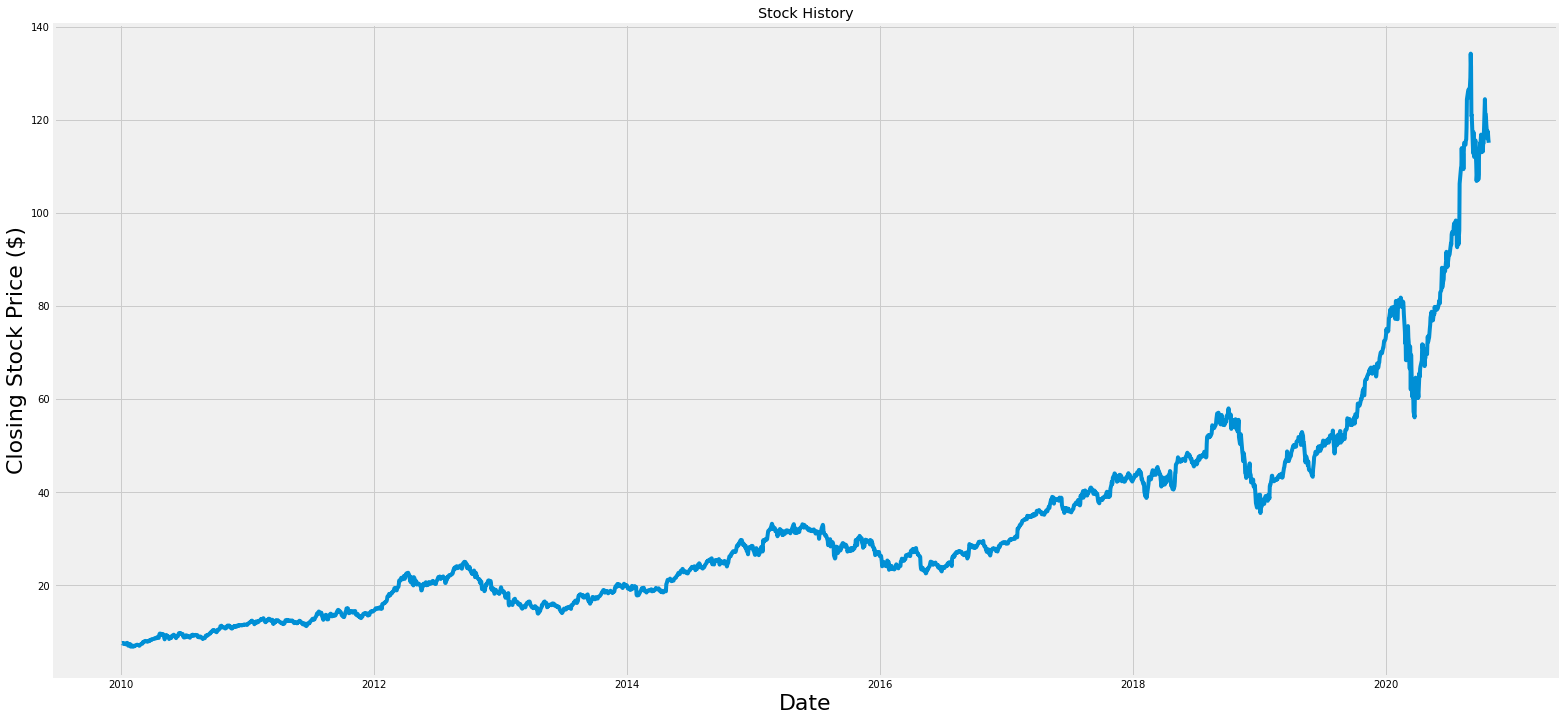

In [5]:
plt.figure(figsize = (24,12))
plt.title('Stock History')
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Closing Stock Price ($)', fontsize = 22)
plt.plot(df['Close'])
plt.show()

**Training the model with 80% of the Data**

In [6]:
data = df.filter(['Close'])
ds = data.values
training = m.ceil(len(ds)*0.8)
training

2178

**Scaling of Data**

In [7]:
sc = mms(feature_range=(0,1))
sd = sc.fit_transform(ds)
sd

array([[0.0061599 ],
       [0.00626369],
       [0.00530717],
       ...,
       [0.86404457],
       [0.85524789],
       [0.84967144]])

1.   Creating **Training** Dataset
2.   Creating **Scaled Training** Dataset
3.   **Spliting** the Dataset into **Two** Datasets



In [8]:
td = sd[0:training, :]
x_train = []
y_train = []
for i in range(60,len(td)):
  x_train.append(td[i-60 : i, 0])
  y_train.append(td[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([6.15990411e-03, 6.26368985e-03, 5.30716595e-03, 5.19776997e-03,
       5.59047946e-03, 5.06593301e-03, 4.39552399e-03, 5.21740582e-03,
       4.87518850e-03, 3.89341851e-03, 6.44882412e-03, 5.52035143e-03,
       4.49369950e-03, 1.59888170e-03, 3.09117254e-03, 3.89622363e-03,
       4.44040594e-03, 2.03085915e-03, 2.80512132e-06, 7.51753789e-04,
       1.06872501e-03, 2.01402842e-03, 0.00000000e+00, 9.56523900e-04,
       5.80645133e-04, 1.16129401e-03, 8.61153520e-04, 1.85694537e-03,
       2.33660988e-03, 3.18373780e-03, 2.94530998e-03, 3.05190084e-03,
       2.69846305e-03, 2.34783037e-03, 1.40533208e-03, 2.41515328e-03,
       2.79103205e-03, 3.52595511e-03, 4.75176691e-03, 4.71249521e-03,
       4.84713729e-03, 5.23423654e-03, 7.54560408e-03, 7.58206691e-03,
       8.68726224e-03, 9.19777934e-03, 9.38291735e-03, 9.69147321e-03,
       8.91727470e-03, 9.08838336e-03, 8.99581810e-03, 9.14448578e-03,
       8.47127165e-03, 9.17253700e-03, 1.01851596e-02, 1.04684731e-02,
     

**Converting x_train and y_train to numpy array**

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2118, 60, 1)

**LSTM Model**

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2118/2118 [==============================] - 39s 19ms/step - loss: 2.0013e-04


1.   **Creating testing Dataset**
2.   **Creating a new array containing scaled values from index 1695 to 2193**



In [13]:
td = sd[training - 60 : , :]
x_test = []
y_test = ds[training : , :]
for i in range (60, len(td)):
  x_test.append(td[i - 60 : i, 0])

**Converting the test data to numpy array**

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
if predictions.all() == y_test.all():
  print('Yes')

Yes


Thus predictions are exactly similar to y_test

**Root Mean Square Error**

In [17]:
rms = np.sqrt(np.mean(predictions - y_test) ** 2)
rms

3.1202491381589104

**Plotting the data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


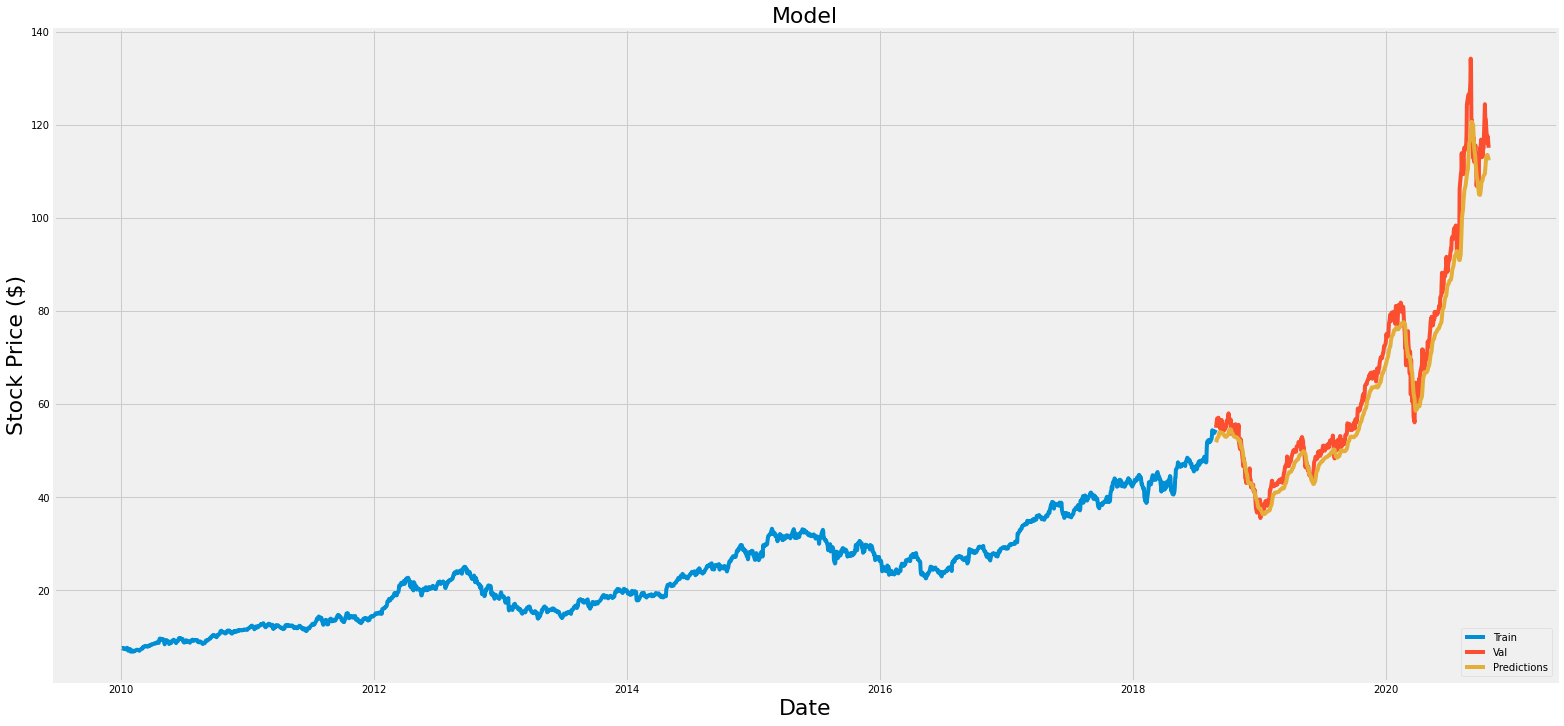

In [18]:
train = data[ : training] 
valid = data[training : ]
valid['Predictions'] = predictions
plt.figure(figsize = (24,12))
plt.title('Model',fontsize = 22)
plt.xlabel('Date',fontsize = 22)
plt.ylabel('Stock Price ($)',fontsize = 22)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [19]:
valid

,Close,Predictions
Date,,
2018-08-28,54.924999,51.807137
2018-08-29,55.744999,51.997475
2018-08-30,56.257500,52.267464
2018-08-31,56.907501,52.602848
2018-09-04,57.090000,53.003010
...,...,...
2020-10-19,115.980003,113.523621
2020-10-20,117.510002,113.377380
2020-10-21,116.870003,113.137024


In [20]:
name_quote = web.DataReader('name','yahoo', start='1980-01-01', end = d_yesterday)
new_df = name_quote.filter(['Close'])
last_60 = new_df[-60:].values
last_60_scaled = sc.transform(last_60)
X_test = []
X_test.append((last_60_scaled))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict_price = model.predict(X_test)
predict_price = sc.inverse_transform(predict_price)
print("Predicted Price = ",predict_price)

Predicted Price =  [[0.44546548]]


In [21]:
name_quote = web.DataReader(name, 'yahoo', start = d_yesterday, end = yesterday)
print(name_quote['Close'])

Date
2020-10-23    115.040001
Name: Close, dtype: float64
